Graded Project 3 - Python for DS

1. Import required libraries and read the dataset.(2) 

In [65]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix,roc_curve,accuracy_score,auc,roc_auc_score  
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.preprocessing import StandardScaler,MinMaxScaler  ## to Normalize
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.metrics import silhouette_score
from sklearn.cluster import AgglomerativeClustering

import warnings
warnings.filterwarnings('ignore')

In [66]:
df = pd.read_csv('loan_approval_data.csv', encoding='unicode_escape')

2. Check the first few samples, shape, info of the data and try to familiarize yourself with different features. (2)

In [67]:
df.shape

(614, 13)

In [68]:
df.info

<bound method DataFrame.info of       loan_id  gender married  dependents     education self_employed  \
0    lp001002    male      no         0.0      graduate            no   
1    lp001003    male     yes         1.0      graduate            no   
2    lp001005    male     yes         0.0      graduate           yes   
3    lp001006    male     yes         0.0  not graduate            no   
4    lp001008    male      no         0.0      graduate            no   
..        ...     ...     ...         ...           ...           ...   
609  lp002978  female      no         0.0      graduate            no   
610  lp002979    male     yes         3.0      graduate            no   
611  lp002983    male     yes         1.0      graduate            no   
612  lp002984    male     yes         2.0      graduate            no   
613  lp002990  female      no         0.0      graduate           yes   

     applicantincome  coapplicantincome  loanamount  loan_amount_term  \
0               58

In [69]:
df.head()

,loan_id,gender,married,dependents,education,self_employed,applicantincome,coapplicantincome,loanamount,loan_amount_term,credit_history,property_area,loan_status
0,lp001002,male,no,0.0,graduate,no,5849,0.0,NaN,360.0,1.0,urban,y
1,lp001003,male,yes,1.0,graduate,no,4583,1508.0,128.0,360.0,1.0,rural,n
2,lp001005,male,yes,0.0,graduate,yes,3000,0.0,66.0,360.0,1.0,urban,y
3,lp001006,male,yes,0.0,not graduate,no,2583,2358.0,120.0,360.0,1.0,urban,y
4,lp001008,male,no,0.0,graduate,no,6000,0.0,141.0,360.0,1.0,urban,y


3. Check for missing values in the dataset, if present? handle them with appropriate methods and drop redundant features. (2)

In [70]:
#Overview of the data
def data_overiew(df, message):
    print(f'{message}:\n')
    print("Data Features:")
    print(df.columns.tolist())
    print("\nMissing values %:\n", df.isnull().sum()/len(df)*100)
    print("\nMissing values:", df.isnull().sum().values.sum())
    
data_overiew(df, 'Overview of the dataset')

Overview of the dataset:

Data Features:
['loan_id', 'gender', 'married', 'dependents', 'education', 'self_employed', 'applicantincome', 'coapplicantincome', 'loanamount', 'loan_amount_term', 'credit_history', 'property_area', 'loan_status']

Missing values %:
 loan_id              0.000000
gender               2.117264
married              0.488599
dependents           2.442997
education            0.000000
self_employed        5.211726
applicantincome      0.000000
coapplicantincome    0.000000
loanamount           3.583062
loan_amount_term     2.280130
credit_history       8.143322
property_area        0.000000
loan_status          0.000000
dtype: float64

Missing values: 149


In [71]:
df.isna().sum()

loan_id               0
gender               13
married               3
dependents           15
education             0
self_employed        32
applicantincome       0
coapplicantincome     0
loanamount           22
loan_amount_term     14
credit_history       50
property_area         0
loan_status           0
dtype: int64

In [72]:
df.dtypes

loan_id               object
gender                object
married               object
dependents           float64
education             object
self_employed         object
applicantincome        int64
coapplicantincome    float64
loanamount           float64
loan_amount_term     float64
credit_history       float64
property_area         object
loan_status           object
dtype: object

In [73]:
df.dropna(axis=0, how='any', thresh=None, subset=None, inplace=True)
df.isnull().sum()/len(df)*100

loan_id              0.0
gender               0.0
married              0.0
dependents           0.0
education            0.0
self_employed        0.0
applicantincome      0.0
coapplicantincome    0.0
loanamount           0.0
loan_amount_term     0.0
credit_history       0.0
property_area        0.0
loan_status          0.0
dtype: float64

In [74]:
#df.fillna({'gender':'unknown','married':'unknown','self_employed':'unknown','credit_history':0}, inplace=True)
#cols=['dependents','loanamount','loan_amount_term']
#df[cols]=df[cols].fillna(df[cols].mean())

In [75]:
df.head()

,loan_id,gender,married,dependents,education,self_employed,applicantincome,coapplicantincome,loanamount,loan_amount_term,credit_history,property_area,loan_status
1,lp001003,male,yes,1.0,graduate,no,4583,1508.0,128.0,360.0,1.0,rural,n
2,lp001005,male,yes,0.0,graduate,yes,3000,0.0,66.0,360.0,1.0,urban,y
3,lp001006,male,yes,0.0,not graduate,no,2583,2358.0,120.0,360.0,1.0,urban,y
4,lp001008,male,no,0.0,graduate,no,6000,0.0,141.0,360.0,1.0,urban,y
5,lp001011,male,yes,2.0,graduate,yes,5417,4196.0,267.0,360.0,1.0,urban,y


In [76]:
print("Duplicate Records : ",len(df[df.duplicated()]))

Duplicate Records :  0


In [77]:
df=df.drop(columns=['loan_id','coapplicantincome'],axis=1)

In [78]:
df.dtypes

gender               object
married              object
dependents          float64
education            object
self_employed        object
applicantincome       int64
loanamount          float64
loan_amount_term    float64
credit_history      float64
property_area        object
loan_status          object
dtype: object

4. Visualize the distribution of the target column 'loan_status' with respect to various categorical features 
and write your observations. (2)

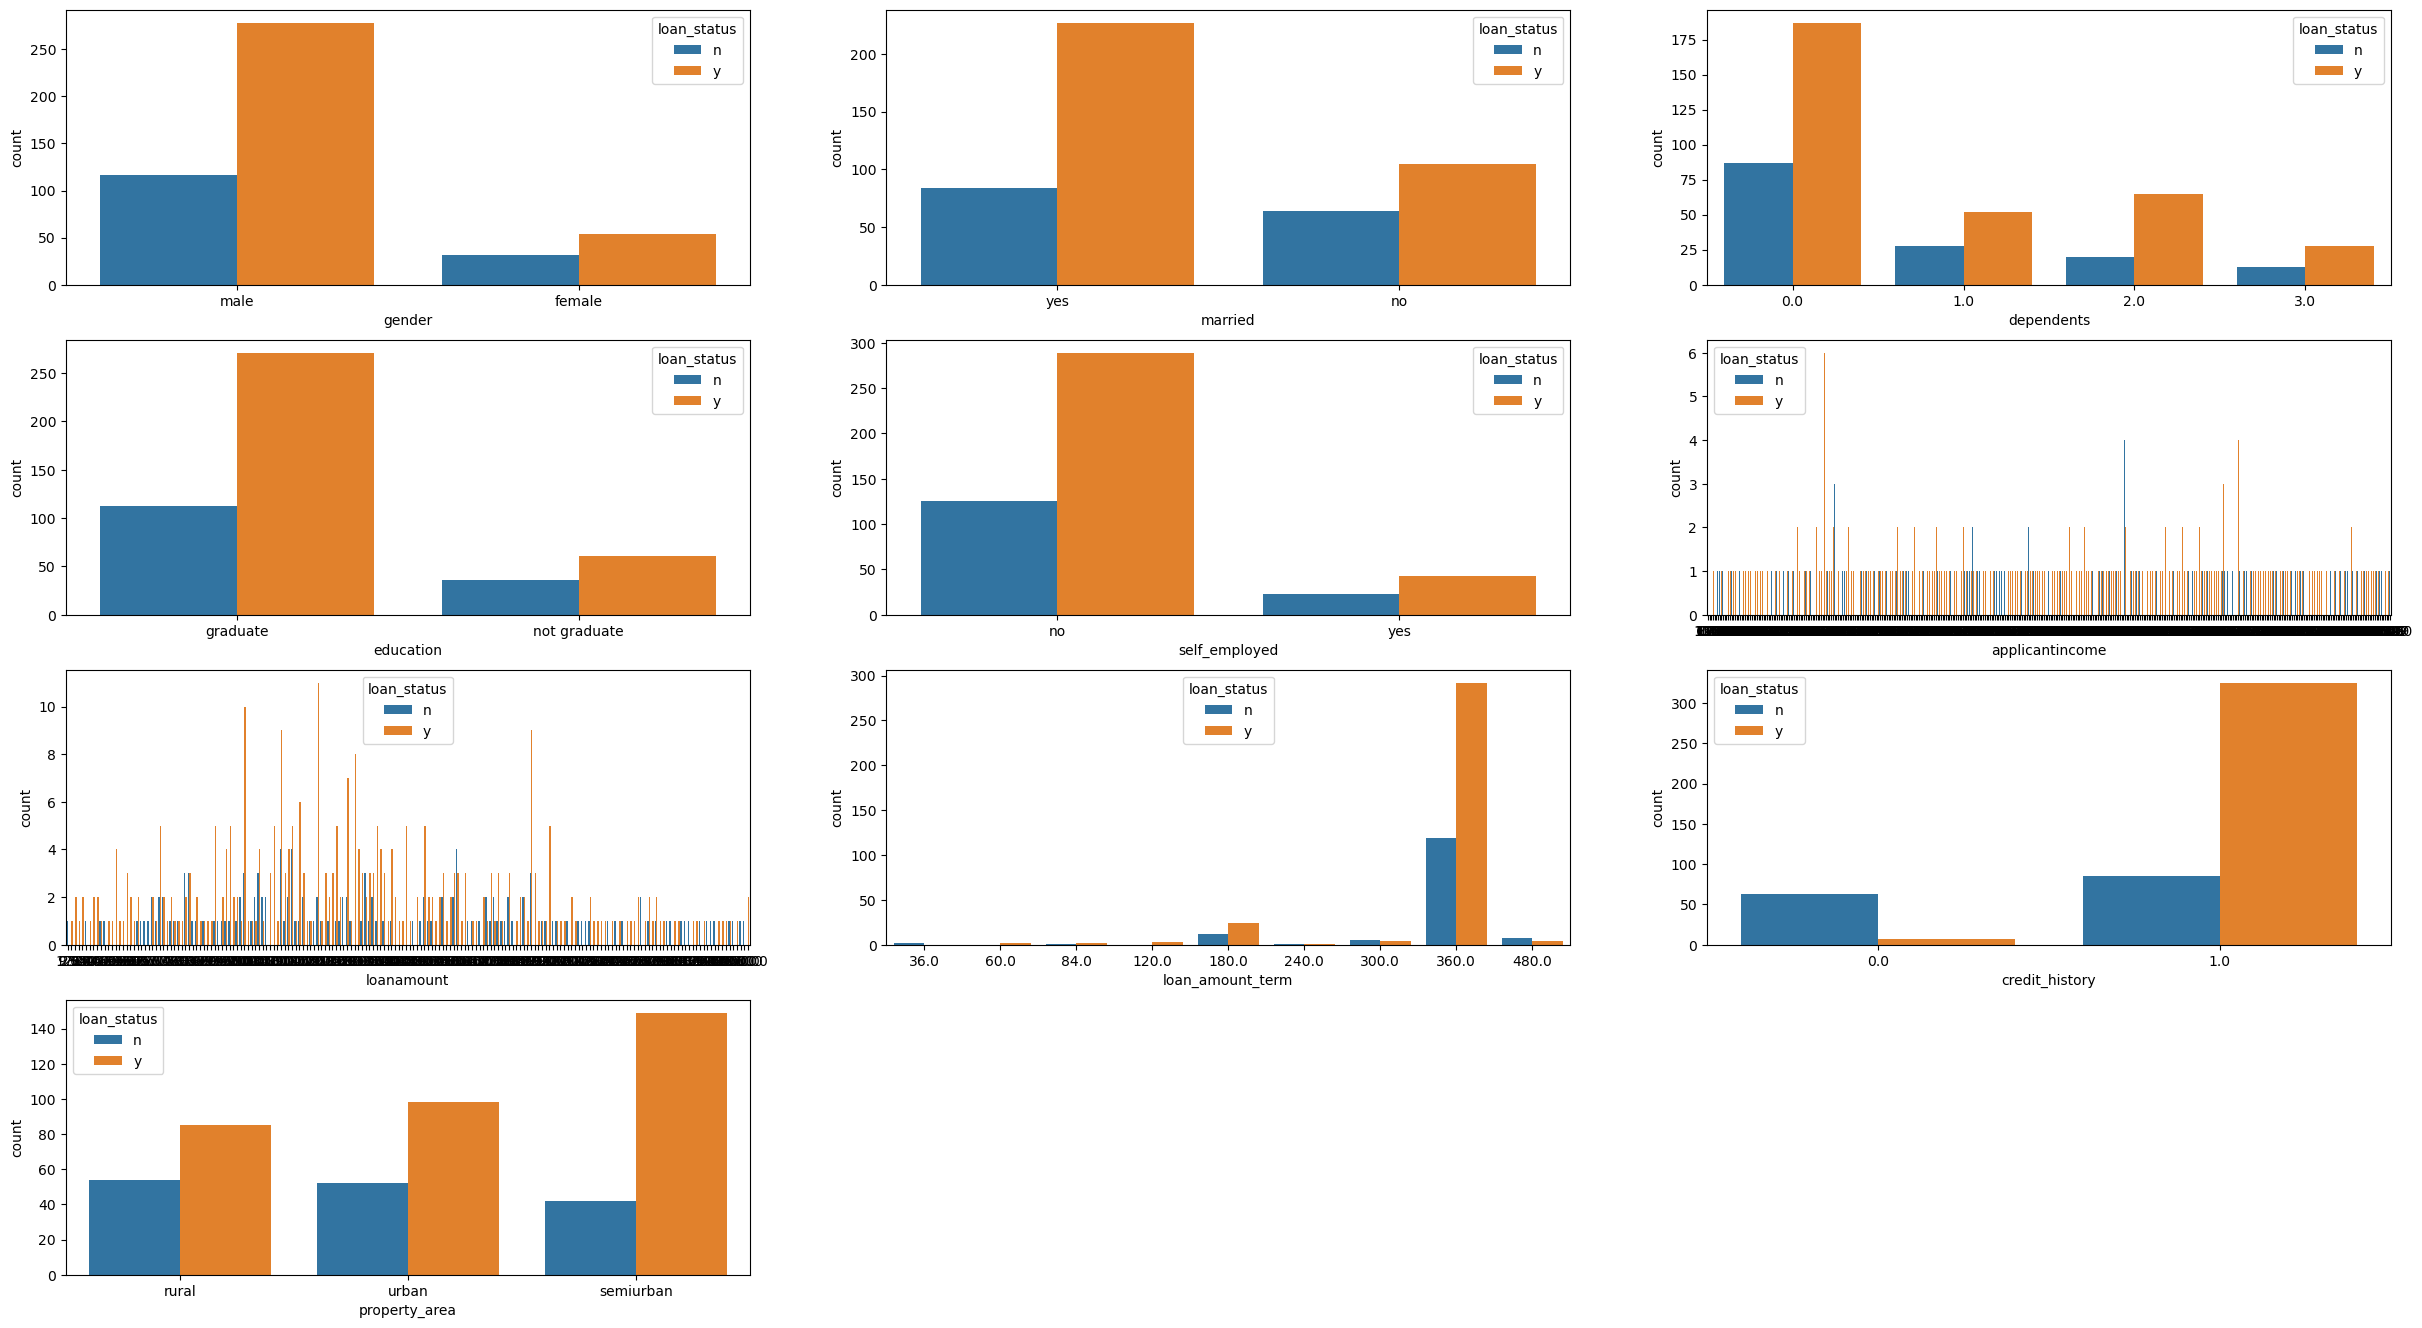

In [79]:
categorical_features=['gender','married','dependents','education','self_employed','applicantincome',
                     'loanamount','loan_amount_term','credit_history','property_area']
i=1
plt.figure(figsize=(30,25))
for feature in categorical_features:
    plt.subplot(6,3,i)
    sns.countplot(x=feature,hue='loan_status',data=df)
    i+=1

More Loans given to Self Employed Married Graduate Males having property at Semi Urban area having less dependents with high credit history.  

5. Encode the categorical data. (2)

In [80]:
#unique values
cols = ['gender','married','education','self_employed','property_area','loan_status']

for col in cols:
    print("\n",col,df[col].unique())


 gender ['male' 'female']

 married ['yes' 'no']

 education ['graduate' 'not graduate']

 self_employed ['no' 'yes']

 property_area ['rural' 'urban' 'semiurban']

 loan_status ['n' 'y']


In [81]:
df['gender']=np.where(df['gender']=='male',1,0).astype(int)
df['married']=np.where(df['married']=='yes',1,0).astype(int)
df['education']=np.where(df['education']=='graduate',1,0).astype(int)
df['self_employed']=np.where(df['self_employed']=='yes',1,0).astype(int)
df['property_area']=np.where(df['property_area']=='rural',2,np.where(df['property_area']=='semiurban',1,0)).astype(int)
df['loan_status']=np.where(df['loan_status']=='y',1,0).astype(int)
df.head()

,gender,married,dependents,education,self_employed,applicantincome,loanamount,loan_amount_term,credit_history,property_area,loan_status
1,1,1,1.0,1,0,4583,128.0,360.0,1.0,2,0
2,1,1,0.0,1,1,3000,66.0,360.0,1.0,0,1
3,1,1,0.0,0,0,2583,120.0,360.0,1.0,0,1
4,1,0,0.0,1,0,6000,141.0,360.0,1.0,0,1
5,1,1,2.0,1,1,5417,267.0,360.0,1.0,0,1


6. Separate the target and independent features and split the data into train and test. (2)

In [82]:
#Separate the Target and Independent features
x=df.drop('loan_status', axis=1)
y=df['loan_status']

In [83]:
#Split the data
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.2)

print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(384, 10) (96, 10)
(384,) (96,)


In [84]:
sc = StandardScaler()
X_std =  sc.fit_transform(x)          
cov_matrix = np.cov(X_std.T)
print('Covariance Matrix \n%s', cov_matrix)

Covariance Matrix 
%s [[ 1.00208768e+00  3.50153982e-01  2.17964061e-01 -5.93684684e-02
  -2.76640356e-03  3.27121324e-02  9.91817623e-02 -8.88894503e-02
   2.24939372e-02  2.04718162e-04]
 [ 3.50153982e-01  1.00208768e+00  3.87173970e-01 -1.65546416e-03
   1.57071172e-02  3.67940143e-02  1.83825336e-01 -1.07728022e-01
   2.91554449e-02 -3.87332951e-02]
 [ 2.17964061e-01  3.87173970e-01  1.00208768e+00 -2.86673867e-02
   4.58495154e-02  1.31413180e-01  1.73141119e-01 -9.65619975e-02
  -2.67067966e-02 -1.19330143e-03]
 [-5.93684684e-02 -1.65546416e-03 -2.86673867e-02  1.00208768e+00
   5.09522476e-03  1.31445958e-01  1.73140382e-01  1.02380919e-01
   5.67742296e-02 -5.51197892e-02]
 [-2.76640356e-03  1.57071172e-02  4.58495154e-02  5.09522476e-03
   1.00208768e+00  1.71141257e-01  1.20640194e-01 -3.49248721e-02
  -2.36176440e-02  5.09028983e-02]
 [ 3.27121324e-02  3.67940143e-02  1.31413180e-01  1.31445958e-01
   1.71141257e-01  1.00208768e+00  4.96343635e-01 -1.08607186e-02
  -5.626958

7. Build any classification model to predict the loan status of the customer and save your model using pickle. (3)

In [85]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import StackingClassifier


lr = LogisticRegression()
nb = GaussianNB()
knn = KNeighborsClassifier()
dt = DecisionTreeClassifier()
rf = RandomForestClassifier()
adb = AdaBoostClassifier()
gb = GradientBoostingClassifier()

estimators = [('rf',rf),('knn',knn),('gb',gb),('adb',adb)]
sc = StackingClassifier(estimators=estimators, final_estimator=rf)

In [86]:
def fit_n_print(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, pred)
    return accuracy

In [87]:
result = pd.DataFrame(columns = ['Accuracy'])

for model, model_name in zip([lr, nb, knn, dt, rf, adb, gb, sc],
                            ['Logistic Regression','Naive Bayes', 'KNN', 'Decision Tree', 'Random Forest',
                            'Ada Boost', 'Gradient Boost', 'Stacking']):
    result.loc[model_name]=fit_n_print(model, X_train, X_test, y_train, y_test)

In [88]:
result

,Accuracy
Logistic Regression,0.760417
Naive Bayes,0.760417
KNN,0.645833
Decision Tree,0.729167
Random Forest,0.770833
Ada Boost,0.760417
Gradient Boost,0.760417
Stacking,0.770833


Random Forest and Gradient Boost are giving 82.29% Accuracy

In [89]:
#from sklearn.ensemble import GradientBoostingClassifier

#gradient_booster = GradientBoostingClassifier(learning_rate=0.1)

#gradient_booster.fit(X_train,y_train)

#print(classification_report(y_test,gradient_booster.predict(X_test)))

In [90]:
from sklearn.ensemble import RandomForestRegressor

# Instantiate model with 1000 decision trees
rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)
# Train the model on training data
rf.fit(X_train, y_train);

In [91]:
# Use the forest's predict method on the test data
predictions = rf.predict(X_test)
# Calculate the absolute errors
errors = abs(predictions - y_test)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2))

Mean Absolute Error: 0.31


In [92]:
import pickle
# Saving model to disk
pickle.dump(rf, open('model.pkl','wb'))
